In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import itertools
import cv2
import h5py
import os
from scipy.misc import imread, imsave
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Data Overview

To start, let's import the model and set the data directory for the rest of the analysis. I have two sets of data (self-recorded and Udacity) to use.

In [4]:
DATA_DIR = "data/"

In [5]:
images = len(os.listdir(DATA_DIR + "IMG"))
print("The data set has " + str(images) + " images. ")

The data set has 24108 images. 


Now to check some images in the dataset for clarity.

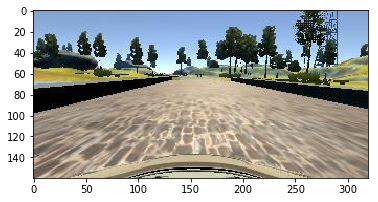

In [6]:
random_image = imread("data/IMG/center_2016_12_01_13_30_48_287.jpg")
plt.imshow(random_image)

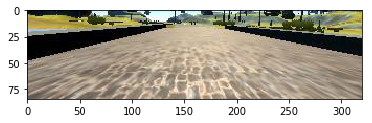

In [12]:
cropped_image = random_image[50:random_image.shape[0]-25, :]
plt.imshow(cropped_image)

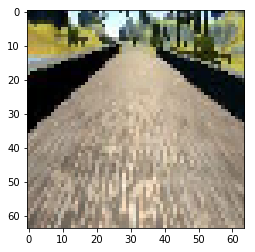

In [13]:
small_image = cv2.resize(cropped_image, (64, 64))
plt.imshow(small_image)

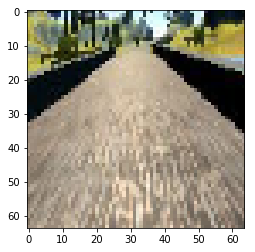

In [14]:
flipped_image = cv2.flip(small_image, 1)
plt.imshow(flipped_image)

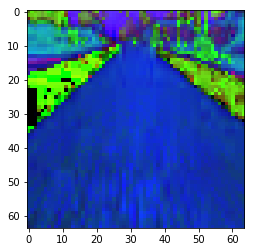

In [18]:
hsv_image = cv2.cvtColor(small_image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_image)

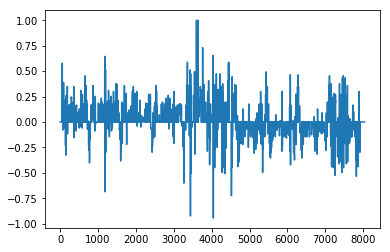

In [15]:
plt.plot(df["steering"])

# Driving Log Stats & Distribution

Continuing, let's analyse the driving log, which values it has and some standard data about the log.

In [9]:
df = pd.read_csv(DATA_DIR + "driving_log.csv")
df.describe()

,steering,throttle,brake,speed
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.004070,0.869660,0.001970,28.169839
std,0.128840,0.301326,0.036565,6.149327
min,-0.942695,0.000000,0.000000,0.502490
25%,0.000000,0.985533,0.000000,30.183093
50%,0.000000,0.985533,0.000000,30.186400
75%,0.000000,0.985533,0.000000,30.186640
max,1.000000,0.985533,1.000000,30.709360


Assuming the Udacity dataset was gathered while driving using the keyboard, it should have a disproportionately high amount of zeroes. The histogram confirms that.

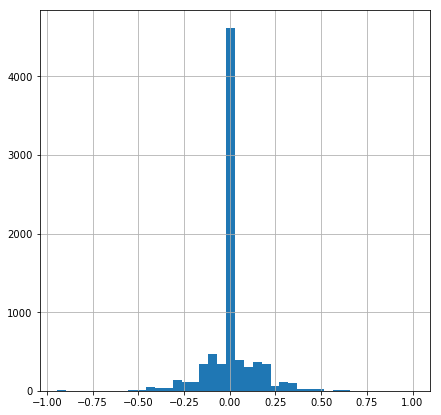

In [10]:
df["steering"].hist(bins=40, figsize=(7, 7))

We can use a simple Pandas filter to demonstrate what happens when we cut off values between -0.01 and 0.01 entirely. The dataset becomes much more "balanced".

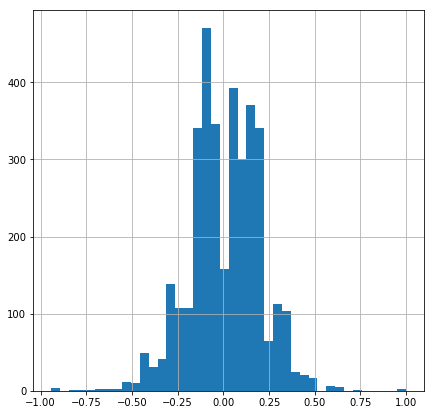

In [11]:
df[
    (df["steering"] < - 0.01) |
    (df["steering"] >   0.01)
]["steering"].hist(bins=40, figsize=(7,7))